“The goal of this analysis is to predict people's body condition - ‘extremely overweight’, ‘fit’, ‘malnourished’, ‘overweight’, ‘slightly overweight’, or ‘underweight’ - based on their gender, height, and weight. To achieve this, I utilized a machine learning model, specifically a Support Vector Classifier (SVC), which was trained on a dataset containing the features ‘Gender’, ‘Height’, and ‘Weight’.”

In [18]:
#Import the necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
data = pd.read_csv(r"C:/Users/DELL/Desktop/BOOTCAMP/COVID 19/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
#Check the dataset
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
#Import the necessary libaries used for machine learning
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#To change the gender to categorical to 0 or 1 using LabelEncoder

In [7]:
# Encode the 'Gender' column from categorical to numerical values
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [8]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [9]:
# Define the health categories and corresponding bins
bins = (-1, 0, 1, 2, 3, 4, 5)
health = ['malnourished', 'underweight', 'fit', 'slightly overweight', 'overweight', 'extremely overweight']

# Categorize 'Index' based on the defined bins and assign the corresponding health status
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)


In [10]:
#check the ‘Index’ column which contains the health status of individuals in the dataset 
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

In [11]:
#count the number of occurrences of each unique value in the ‘Index’ column
data['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

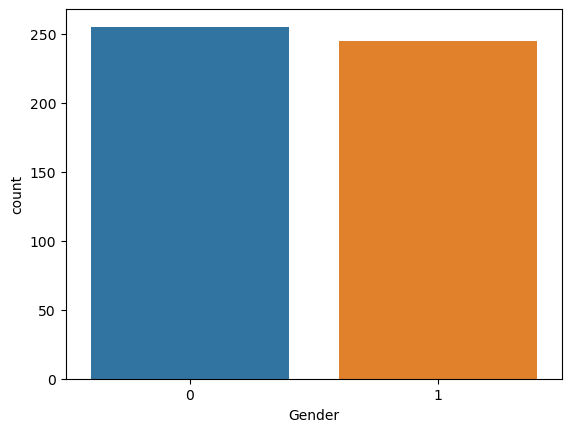

In [12]:
##create a count plot for the ‘Gender’ to see the count of Gender
sns.countplot(x=data['Gender'])

#From the countplot, the number of females is about around 255 and the number of males is around 245

<Axes: xlabel='Index', ylabel='count'>

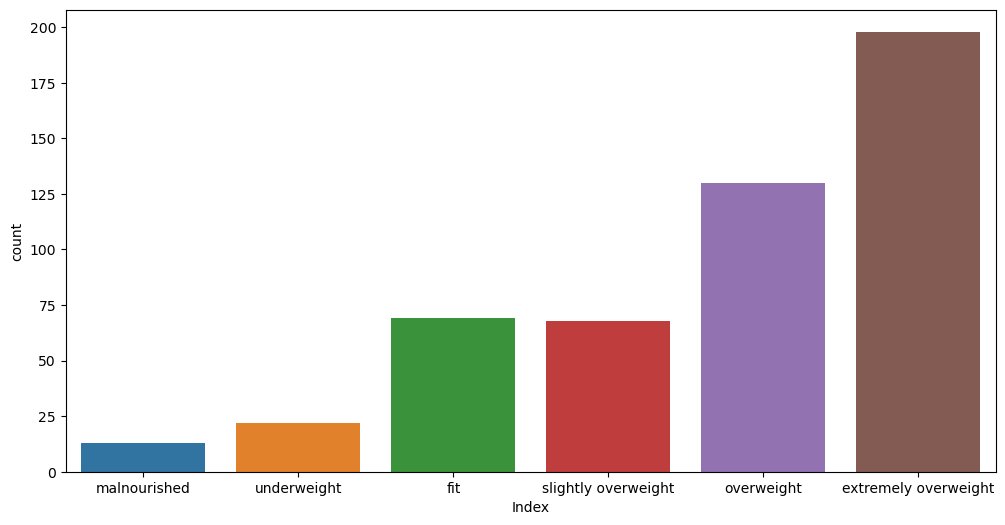

In [26]:
# Create the countplot to see the count of body condition
plt.figure(figsize=(12, 6)) 
sns.countplot(x=data['Index'])

#The number of extremely overweight persons is higher with about 200, followed by overweight with about 125. 
#Few people are malnurished and overweight while abou 70 people are fit

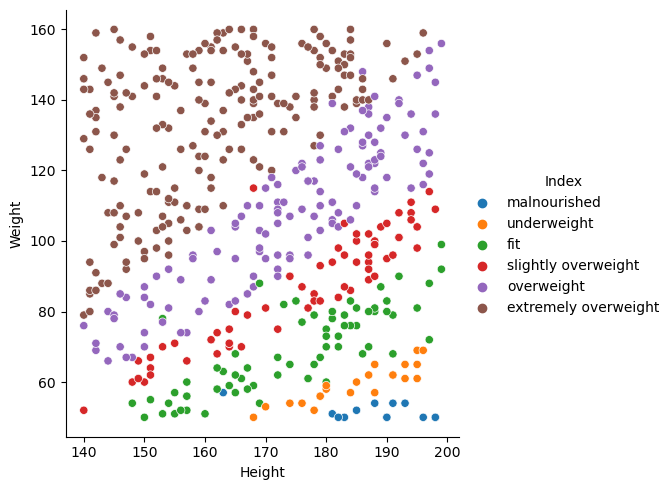

In [246]:
#create a relational plot to visualize the relationship between ‘Height’, ‘Weight’, and ‘Index’
sns.relplot(x='Height', y='Weight', hue= 'Index', data=data)

- In this plot, the number of malnourished people are few with height of between 180 and 200 and weight below 60
- Many extremely overweight people with weight between 80 and 160, and height between 140 and 195
- People who are fit have weight between 50 and 100, height between 148 and 198


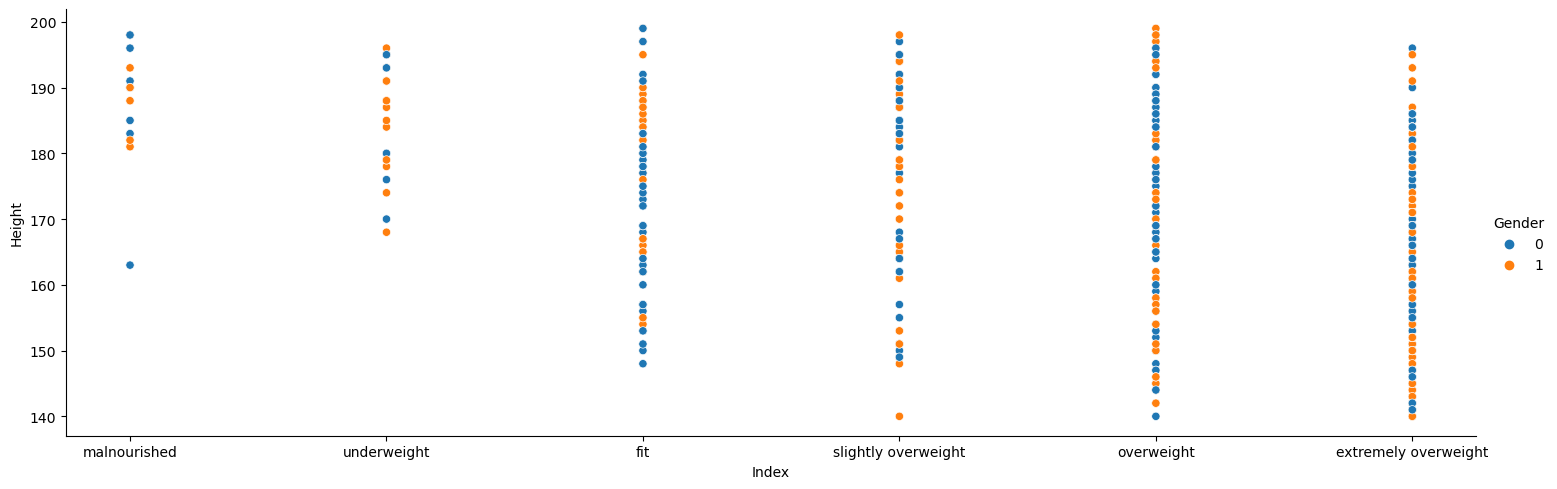

In [247]:
#create a relational plot to visualize the relationship between ‘Height’, ‘Gender’, and ‘Index
sns.relplot(x='Index', y='Height', hue= 'Gender', data=data, height = 5, aspect = 3)

- This plot also shows that their are few malnourished male and female with female's height starting from 164
- There are more male and female who are overweight and extremely overweight within the heights of 140 and 198

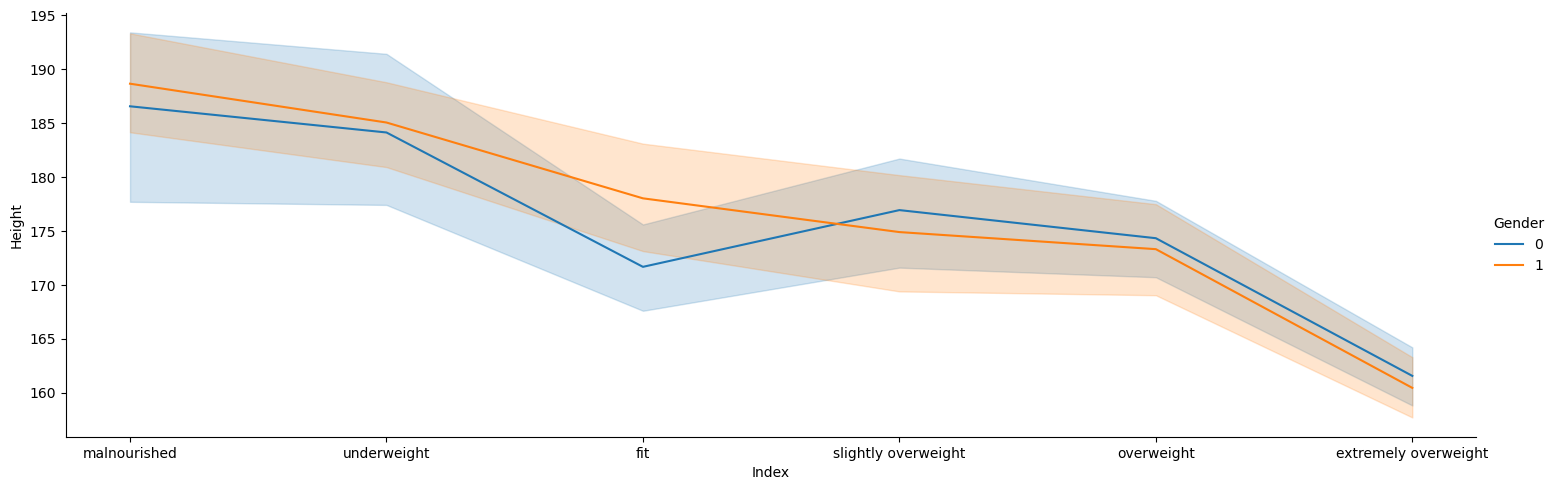

In [248]:
#create a line plot to visualize the relationship between ‘Height’, ‘Gender’, and ‘Index
sns.relplot(x='Index', y='Height', hue= 'Gender', kind = 'line', data=data, height = 5, aspect = 3)

- In this line plot, the AVERAGE HEIGHT of males who are malnourished, underweight and fit is higher than the females
but lower than the females interms of slightly overweight, overweight and extremely overweight


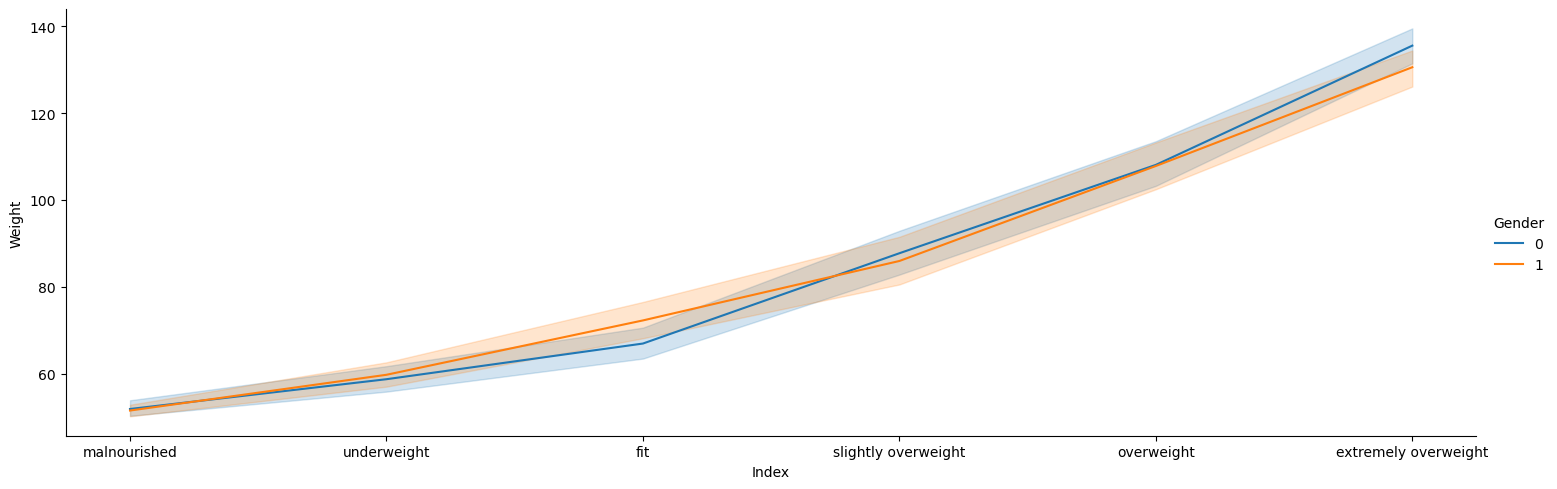

In [249]:
#create a line plot to visualize the relationship between ‘Weight’, ‘Gender’, and ‘Index
sns.relplot(x='Index', y='Weight', hue= 'Gender', kind = 'line', data=data, height = 5, aspect = 3)

- In this line plot, the AVERAGE WEIGHT of males and females who are malnourished are almost the same, males who are underweight and fit are higher
- males and females who are overweight are almost the same and extremely overweight females is slightly above the males

#To predict the body mass#

In [251]:
# Drop the 'Index' column from data and assign to x
x = data.drop('Index', axis = 1)

# Assign 'Index' column from data to y
y = data['Index']

In [252]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [253]:
# Initialize a StandardScaler and fit it to the training data
s = StandardScaler()
x_train = s.fit_transform(x_train)

# Transform the testing data using the fitted scaler
x_test = s.transform(x_test)    

In [254]:
# Initialize a Support Vector Classifier and fit it to the training data
clf = svm.SVC()
clf.fit(x_train, y_train)

# Predict the 'Index' using the trained classifier
pred = clf.predict(x_test)

In [255]:
# Print the classification report
print(classification_report(y_test, pred, zero_division=1))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       1.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.82      0.71      0.68       100
        weighted avg       0.87      0.85      0.84       100



In [256]:
# Print the confusion matrix
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [257]:
# Print the accuracy score
print(accuracy_score(y_test, pred))

0.85


In [268]:
# Transform and predict the class for a new data point(Test the classifier for a new value)
a = [[0,150,153]]
a = s.transform(a)
b = clf.predict(a)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [269]:
b

array(['extremely overweight'], dtype=object)

In [265]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight
